## Data Importing and Pre-processing

In [1]:
# import libraries needed
import pandas as pd

pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
from datetime import datetime

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas.*")
%matplotlib inline

/var/folders/70/w4xrfl3x75dbhk6l45_fgqmw0000gn/T/ipykernel_88964/1082269227.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# read file and see number of rows and cols
nba_df = pd.read_csv("full_nba_salaries.csv")
nba_df.shape

(20883, 36)

In [3]:
nba_df.head()

,Unnamed: 0,Season,Age,Tm,Lg_x,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Name,Team,Lg_y,Salary
0,13831,1979-80,20,LAL,NBA,SG,77,NaN,36.3,6.5,12.3,.530,0.1,0.4,.226,6.4,11.9,.540,.534,4.9,6.0,.810,2.2,5.6,7.7,7.3,2.4,0.5,4.0,2.8,18.0,"AS,ROY-2",Magic Johnson,Los Angeles Lakers,NBA,"$460,000"
1,17822,1979-80,23,BOS,NBA,PF,82,82,36.0,8.5,17.8,0.474,0.7,1.7,0.406,7.7,16.1,0.481,0.494,3.7,4.4,0.836,2.6,7.8,10.4,4.5,1.7,0.6,3.2,3.4,21.3,"MVP-4,NBA1,AS,ROY-1",Larry Bird,Boston Celtics,NBA,"$650,000"
2,17823,1980-81,24,BOS,NBA,PF,82,82,39.5,8.8,18.3,0.478,0.2,0.9,0.27,8.5,17.4,0.489,0.485,3.5,4.0,0.863,2.3,8.6,10.9,5.5,2.0,0.8,3.5,2.9,21.2,"MVP-2,NBA1,AS",Larry Bird,Boston Celtics,NBA,"$650,000"
3,13832,1980-81,21,LAL,NBA,SG,37,NaN,37.1,8.4,15.9,.532,0.1,0.5,.176,8.4,15.4,.542,.534,4.6,6.1,.760,2.7,5.9,8.6,8.6,3.4,0.7,3.9,2.7,21.6,MVP-11,Magic Johnson,Los Angeles Lakers,NBA,"$460,000"
4,17824,1981-82,25,BOS,NBA,PF,77,58,38.0,9.2,18.4,0.503,0.1,0.7,0.212,9.1,17.7,0.514,0.507,4.3,4.9,0.863,2.6,8.3,10.9,5.8,1.9,0.9,3.3,3.2,22.9,"MVP-2,NBA1,DEF2,AS",Larry Bird,Boston Celtics,NBA,"$650,000"


In [4]:
# remove 'Lg_x' and 'Lg_y' columns
# we understand that all of these players are in the NBA so having a column that all says they are in the nba, twice, is unnecessary 
nba_df = nba_df.drop(['Lg_x', 'Lg_y'], axis=1)

# remove the 'Team' column because we already have 'Tm' 
nba_df = nba_df.drop(columns=['Team'])

# reanme 'Unnamed: 0' column to 'ID'
nba_df = nba_df.rename(columns={"Unnamed: 0": "Id"})

In [5]:
print(nba_df.dtypes)

# we see that there are categorical variables that should be labeled as numeric

Id         int64
Season    object
Age        int64
Tm        object
Pos       object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
Awards    object
Name      object
Salary    object
dtype: object


In [6]:
# list all columns from 'MP' to 'AST' that need to be converted to float
col_to_be_floats = nba_df.loc[:, 'MP':'PTS'].columns.tolist()

# add additional columns 'G', 'GS', to the list
col_to_be_floats.extend(['G', 'GS'])

# convert each column to float, handling non-numeric entries
for column in col_to_be_floats:
    # convert non-convertible strings to NaN
    nba_df[column] = pd.to_numeric(nba_df[column], errors='coerce')

In [7]:
# remove the dollar sign and comma from the 'Salary' column
nba_df['Salary'] = nba_df['Salary'].str.replace('$', '', regex=False)
nba_df['Salary'] = nba_df['Salary'].str.replace(',', '', regex=False)

# remove the '(TW)' which stands for a two-way contract
nba_df['Salary'] = nba_df['Salary'].str.replace('(TW)', '', regex=False)

# convert to int
nba_df['Salary'] = nba_df['Salary'].astype(int)

In [8]:
# count number of categorical variables
category_count = 0

for cat in nba_df.dtypes:
    if cat == "object":
        category_count += 1

print("Number of categorical variables:", category_count)

# column 1 is the ID column so we subract 1
numeric_count = nba_df.shape[1] - category_count - 1

print("Number of contineous variables:", numeric_count)

Number of categorical variables: 5
Number of contineous variables: 27


In [9]:
nba_df.head()

,Id,Season,Age,Tm,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Name,Salary
0,13831,1979-80,20,LAL,SG,77.0,NaN,36.3,6.5,12.3,0.530,0.1,0.4,0.226,6.4,11.9,0.540,0.534,4.9,6.0,0.810,2.2,5.6,7.7,7.3,2.4,0.5,4.0,2.8,18.0,"AS,ROY-2",Magic Johnson,460000
1,17822,1979-80,23,BOS,PF,82.0,82.0,36.0,8.5,17.8,0.474,0.7,1.7,0.406,7.7,16.1,0.481,0.494,3.7,4.4,0.836,2.6,7.8,10.4,4.5,1.7,0.6,3.2,3.4,21.3,"MVP-4,NBA1,AS,ROY-1",Larry Bird,650000
2,17823,1980-81,24,BOS,PF,82.0,82.0,39.5,8.8,18.3,0.478,0.2,0.9,0.270,8.5,17.4,0.489,0.485,3.5,4.0,0.863,2.3,8.6,10.9,5.5,2.0,0.8,3.5,2.9,21.2,"MVP-2,NBA1,AS",Larry Bird,650000
3,13832,1980-81,21,LAL,SG,37.0,NaN,37.1,8.4,15.9,0.532,0.1,0.5,0.176,8.4,15.4,0.542,0.534,4.6,6.1,0.760,2.7,5.9,8.6,8.6,3.4,0.7,3.9,2.7,21.6,MVP-11,Magic Johnson,460000
4,17824,1981-82,25,BOS,PF,77.0,58.0,38.0,9.2,18.4,0.503,0.1,0.7,0.212,9.1,17.7,0.514,0.507,4.3,4.9,0.863,2.6,8.3,10.9,5.8,1.9,0.9,3.3,3.2,22.9,"MVP-2,NBA1,DEF2,AS",Larry Bird,650000


### Handling missing data

In [10]:
#Some rows are all labled "Did not play (injury/illness)". We can remove these rows as there is no valuable data
dnp_mask = nba_df['Pos'].str.startswith("Did ")
nba_df = nba_df[~dnp_mask]

In [11]:
# Some of the Awards data are null when they should just be marked as 'None'
nba_df['Awards'].fillna('None', inplace=True)

In [12]:
# display the missing data and its percent of the column
total_missing = nba_df.isnull().sum().sort_values(ascending=False)
percent_missing = (nba_df.isnull().sum() / nba_df.isnull().count()).sort_values(ascending=False)

missing_data_df = pd.concat([total_missing, percent_missing], axis=1, keys=["Total Missing", "Percent Missing"])
missing_data_df

,Total Missing,Percent Missing
3P%,2977,0.144725
FT%,920,0.044725
2P%,189,0.009188
FG%,106,0.005153
eFG%,106,0.005153
GS,2,0.000097
PF,0,0.000000
TOV,0,0.000000
BLK,0,0.000000
FTA,0,0.000000


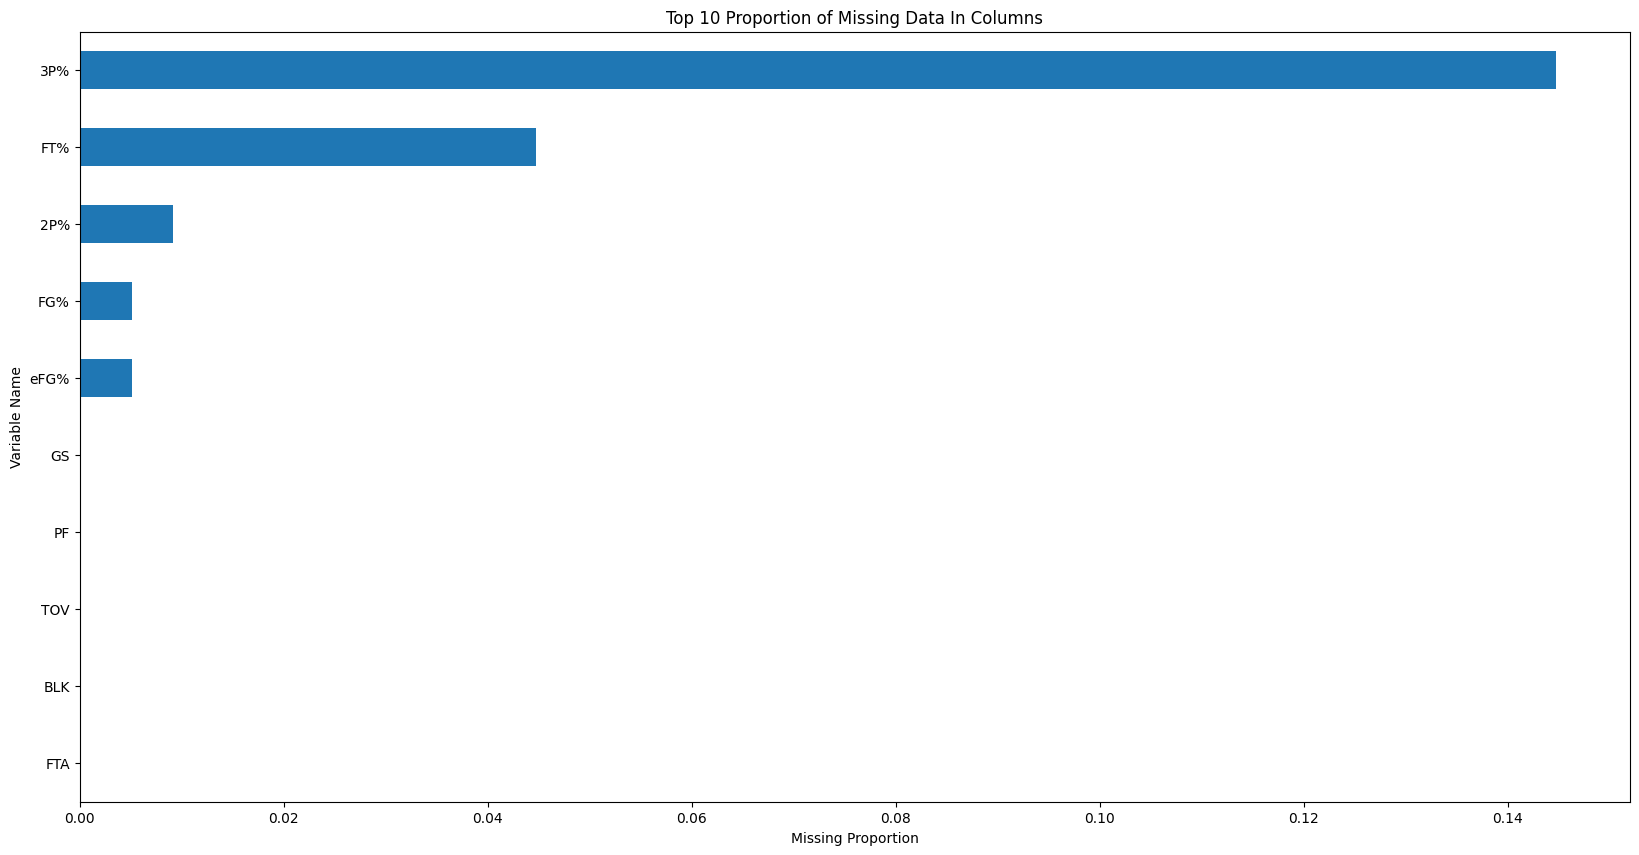

In [13]:
# visualize this in a bar graph
missing_data_df["Percent Missing"].head(10).plot(
    kind="barh", figsize=(20, 10)
).invert_yaxis()  # top 10 missing columns
plt.xlabel("Missing Proportion")
plt.ylabel("Variable Name")
plt.title("Top 10 Proportion of Missing Data In Columns")
plt.show()

In [14]:
# see what the null values are for 'GS'
null_gs = nba_df[nba_df['GS'].isnull()]
null_gs.head()

,Id,Season,Age,Tm,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Name,Salary
0,13831,1979-80,20,LAL,SG,77.0,NaN,36.3,6.5,12.3,0.530,0.1,0.4,0.226,6.4,11.9,0.540,0.534,4.9,6.0,0.81,2.2,5.6,7.7,7.3,2.4,0.5,4.0,2.8,18.0,"AS,ROY-2",Magic Johnson,460000
3,13832,1980-81,21,LAL,SG,37.0,NaN,37.1,8.4,15.9,0.532,0.1,0.5,0.176,8.4,15.4,0.542,0.534,4.6,6.1,0.76,2.7,5.9,8.6,8.6,3.4,0.7,3.9,2.7,21.6,MVP-11,Magic Johnson,460000


In [15]:
# impute Magic Johnson's null values of games started to be equal to his games, since stat was never recorded
nba_df['GS'] = nba_df['GS'].fillna(nba_df['G'])

## Data Analytics

In [16]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [17]:
import pandas as pd

# Filter stats between the 2015-16 season and the 2021-22 season
filtered_df = nba_df[(nba_df['Season'] >= '2015-16') & (nba_df['Season'] <= '2021-22')]

# Select all numerical stat values for a player
columns_to_analyze = ['Salary', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Calculate the correlation matrix between all stats
correlation_matrix = filtered_df[columns_to_analyze].corr()

# View the correlation values between salary and other columns
print(correlation_matrix['Salary'].sort_values(ascending=False))

Salary    1.000000
PTS       0.656104
FG        0.642826
FGA       0.634572
FT        0.602060
FTA       0.591475
2PA       0.585410
MP        0.584752
2P        0.583418
TOV       0.567264
DRB       0.553575
GS        0.532830
AST       0.523058
TRB       0.497532
3PA       0.449410
3P        0.442971
STL       0.431804
PF        0.366696
G         0.329191
BLK       0.279157
Age       0.264546
ORB       0.256487
FT%       0.147473
eFG%      0.115580
FG%       0.110144
3P%       0.093772
2P%       0.081013
Name: Salary, dtype: float64


### Redudant or Correlated Features
It is clear that all percentage statistics are redudant as they have a low correlation value and can already be found in the raw data for shots made and shots attempted. We will remove these columns from the data when feeding it into our model.

We will also be removing Offensive Rebounds (ORB) and Defensive Rebounds (DRB) and only keep the Total Rebounds (TRB). The former stats are included in the latter so having both is redundant as the features are correlated.

We can also remove Games (G) and Games Started (GS) because this data can be reduced to Minutes Played (MP) which has a greater total correlation.

In [ ]:
# Select relevant features and avoid redundancy
selected_features = ['PTS', 'FG', 'FGA' 'FT', 'FTA', '2P', '2PA', '3P', '3PA', 'MP', 'TRB', 'TOV', 'AST', 'STL', 'PF', 'BLK', 'AGE']

# Use the selected features for modeling
X = filtered_df[selected_features]
y = filtered_df['Salary']
